In [1]:
import pandas as pd

The main data structures are
- one-dimensional Series
- two-dimensional DataFrame

Note: Both are wrappers around NumPy arrays.

TOC
<a id="toc">
1. [Read Data/Create DataFrame with .DataFrame and .read_csv](#sec1)
1. [Format/Operate on Columns](#sec2)
1. [Statistics with .describe](#sec3)

# Creating DataFrames
<a id="sec1">
    
[back to toc](#toc)

In [2]:
df = pd.DataFrame({'Name': ['Hans', 'Franz'], 'Alter': [25, 30]})
df

,Name,Alter
0,Hans,25
1,Franz,30


In [3]:
df = pd.read_csv('/etc/passwd', sep=":")
df

,root,x,0,0.1,root.1,/root,/bin/bash
0,daemon,x,1,1,daemon,/usr/sbin,/usr/sbin/nologin
1,bin,x,2,2,bin,/bin,/usr/sbin/nologin
2,sys,x,3,3,sys,/dev,/usr/sbin/nologin
3,sync,x,4,65534,sync,/bin,/bin/sync
4,games,x,5,60,games,/usr/games,/usr/sbin/nologin
5,man,x,6,12,man,/var/cache/man,/usr/sbin/nologin
6,lp,x,7,7,lp,/var/spool/lpd,/usr/sbin/nologin
7,mail,x,8,8,mail,/var/mail,/usr/sbin/nologin
8,news,x,9,9,news,/var/spool/news,/usr/sbin/nologin
9,uucp,x,10,10,uucp,/var/spool/uucp,/usr/sbin/nologin


In [4]:
# Source: https://data.giss.nasa.gov/gistemp/
URL = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
# TODO local alternative
df = pd.read_csv(URL, header=1)
df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.18,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.13,-0.22,-.20,-.17,-.16,***,***,-0.11,-0.15,-.18
1,1881,-0.18,-0.13,0.04,0.06,0.08,-0.17,0.01,-0.02,-0.14,-0.21,-.17,-.06,-.07,-.08,-.16,0.06,-0.06,-.17
2,1882,0.17,0.14,0.05,-0.15,-0.13,-0.21,-0.15,-0.06,-0.14,-0.22,-.16,-.35,-.10,-.08,.09,-0.07,-0.14,-.17
3,1883,-0.28,-0.36,-0.11,-0.18,-0.17,-0.06,-0.06,-0.13,-0.21,-0.11,-.23,-.10,-.17,-.19,-.33,-0.15,-0.09,-.18
4,1884,-0.12,-0.08,-0.36,-0.39,-0.33,-0.34,-0.30,-0.27,-0.26,-0.24,-.32,-.30,-.28,-.26,-.10,-0.36,-0.30,-.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2018,0.81,0.84,0.88,0.89,0.82,0.77,0.82,0.76,0.80,1.02,.82,.92,.85,.85,.86,0.86,0.79,.88
139,2019,0.93,0.94,1.17,1.01,0.85,0.91,0.94,0.94,0.93,1.01,.99,1.09,.98,.96,.93,1.01,0.93,.98
140,2020,1.16,1.24,1.17,1.13,1.02,0.92,0.90,0.87,0.99,0.89,1.10,.81,1.02,1.04,1.17,1.11,0.90,.99
141,2021,0.81,0.64,0.88,0.76,0.78,0.84,0.92,0.81,0.92,0.99,.93,.85,.84,.84,.75,0.81,0.86,.95


FAQ: Yeah, instead of csv-files, you can also read excel- or json-files. The commands are pd.read_excel and pd.read_json, respectively.

# Format/Operate on Columns
<a id="sec2">
    
[back to TOC](#toc)

In [6]:
# get some basic info about how each column is represented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    143 non-null    int64  
 1   Jan     143 non-null    float64
 2   Feb     143 non-null    float64
 3   Mar     143 non-null    float64
 4   Apr     143 non-null    float64
 5   May     143 non-null    float64
 6   Jun     143 non-null    float64
 7   Jul     143 non-null    float64
 8   Aug     143 non-null    float64
 9   Sep     143 non-null    float64
 10  Oct     143 non-null    float64
 11  Nov     143 non-null    object 
 12  Dec     143 non-null    object 
 13  J-D     143 non-null    object 
 14  D-N     143 non-null    object 
 15  DJF     143 non-null    object 
 16  MAM     143 non-null    float64
 17  JJA     143 non-null    float64
 18  SON     143 non-null    object 
dtypes: float64(12), int64(1), object(6)
memory usage: 21.4+ KB


In [11]:
# Year-column should be a datetime-column
df = pd.read_csv(URL, header=1, parse_dates=['Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    143 non-null    datetime64[ns]
 1   Jan     143 non-null    float64       
 2   Feb     143 non-null    float64       
 3   Mar     143 non-null    float64       
 4   Apr     143 non-null    float64       
 5   May     143 non-null    float64       
 6   Jun     143 non-null    float64       
 7   Jul     143 non-null    float64       
 8   Aug     143 non-null    float64       
 9   Sep     143 non-null    float64       
 10  Oct     143 non-null    float64       
 11  Nov     143 non-null    object        
 12  Dec     143 non-null    object        
 13  J-D     143 non-null    object        
 14  D-N     143 non-null    object        
 15  DJF     143 non-null    object        
 16  MAM     143 non-null    float64       
 17  JJA     143 non-null    float64       
 18  SON     14

In [12]:
# if you want to access rows by year instead of row-number, you can set the year as index
df.set_index('Year', inplace=True)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
Year,,,,,,,,,,,,,,,,,,
1880-01-01,-0.18,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.13,-0.22,-.20,-.17,-.16,***,***,-0.11,-0.15,-.18
1881-01-01,-0.18,-0.13,0.04,0.06,0.08,-0.17,0.01,-0.02,-0.14,-0.21,-.17,-.06,-.07,-.08,-.16,0.06,-0.06,-.17
1882-01-01,0.17,0.14,0.05,-0.15,-0.13,-0.21,-0.15,-0.06,-0.14,-0.22,-.16,-.35,-.10,-.08,.09,-0.07,-0.14,-.17
1883-01-01,-0.28,-0.36,-0.11,-0.18,-0.17,-0.06,-0.06,-0.13,-0.21,-0.11,-.23,-.10,-.17,-.19,-.33,-0.15,-0.09,-.18
1884-01-01,-0.12,-0.08,-0.36,-0.39,-0.33,-0.34,-0.30,-0.27,-0.26,-0.24,-.32,-.30,-.28,-.26,-.10,-0.36,-0.30,-.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01,0.81,0.84,0.88,0.89,0.82,0.77,0.82,0.76,0.80,1.02,.82,.92,.85,.85,.86,0.86,0.79,.88
2019-01-01,0.93,0.94,1.17,1.01,0.85,0.91,0.94,0.94,0.93,1.01,.99,1.09,.98,.96,.93,1.01,0.93,.98
2020-01-01,1.16,1.24,1.17,1.13,1.02,0.92,0.90,0.87,0.99,0.89,1.10,.81,1.02,1.04,1.17,1.11,0.90,.99


In [18]:
# regroup 10 years and take the mean
df.resample('10Y').mean()

/tmp/ipykernel_7175/4173055006.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('10Y').mean()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,MAM,JJA
Year,,,,,,,,,,,,
1880-12-31,-0.180,-0.230,-0.080,-0.150,-0.090,-0.200,-0.170,-0.090,-0.130,-0.220,-0.110,-0.150
1890-12-31,-0.296,-0.244,-0.214,-0.207,-0.212,-0.230,-0.169,-0.217,-0.221,-0.210,-0.210,-0.205
1900-12-31,-0.323,-0.283,-0.258,-0.243,-0.205,-0.209,-0.156,-0.165,-0.139,-0.117,-0.234,-0.176
1910-12-31,-0.384,-0.333,-0.314,-0.336,-0.357,-0.345,-0.318,-0.329,-0.345,-0.328,-0.335,-0.332
1920-12-31,-0.300,-0.287,-0.319,-0.296,-0.325,-0.365,-0.306,-0.307,-0.290,-0.271,-0.313,-0.326
1930-12-31,-0.208,-0.272,-0.203,-0.287,-0.282,-0.303,-0.248,-0.253,-0.227,-0.158,-0.256,-0.268
1940-12-31,-0.101,-0.084,-0.139,-0.142,-0.125,-0.149,-0.093,-0.098,-0.073,-0.010,-0.134,-0.113
1950-12-31,0.090,0.015,0.017,0.041,0.031,-0.029,0.005,-0.012,-0.007,0.072,0.031,-0.014
1960-12-31,-0.002,-0.027,-0.099,-0.054,-0.050,-0.041,-0.029,-0.014,-0.016,-0.010,-0.068,-0.028


# Describe
<a id="sec3">
    
[back to TOC](#toc)

/tmp/ipykernel_7175/1035633562.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.resample('10Y').mean().plot()


<AxesSubplot: xlabel='Year'>

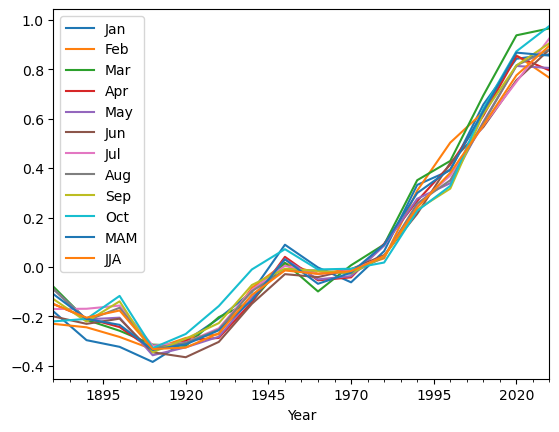

In [20]:
# plot
df.resample('10Y').mean().plot()

<AxesSubplot: xlabel='Year'>

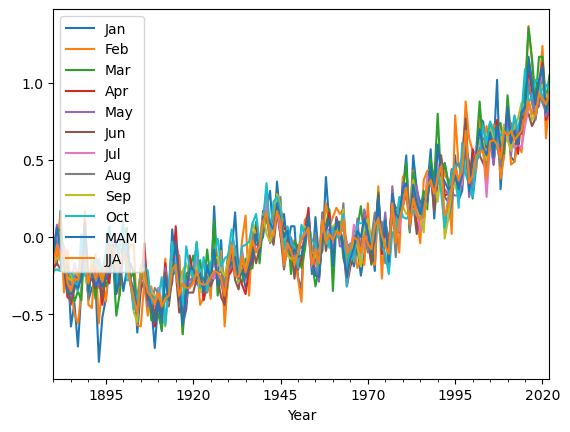

In [21]:
df.plot()

In [22]:
df.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,MAM,JJA
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.059720,0.065455,0.081469,0.057203,0.048322,0.033636,0.057692,0.055385,0.059510,0.085245,0.062937,0.048881
std,0.416476,0.419860,0.422574,0.388621,0.369251,0.365539,0.344859,0.360009,0.357913,0.365887,0.388204,0.353330
min,-0.810000,-0.630000,-0.630000,-0.580000,-0.550000,-0.510000,-0.500000,-0.540000,-0.580000,-0.570000,-0.570000,-0.490000
25%,-0.240000,-0.240000,-0.220000,-0.255000,-0.230000,-0.240000,-0.190000,-0.220000,-0.195000,-0.195000,-0.250000,-0.215000
50%,-0.020000,-0.040000,0.010000,-0.020000,-0.040000,-0.050000,-0.030000,-0.050000,-0.060000,0.010000,-0.030000,-0.050000
75%,0.305000,0.375000,0.310000,0.280000,0.270000,0.240000,0.235000,0.235000,0.240000,0.245000,0.305000,0.235000
max,1.170000,1.370000,1.360000,1.130000,1.020000,0.920000,0.940000,1.010000,0.990000,1.090000,1.140000,0.930000
